In [1]:
import wandb
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
api = wandb.Api()
entity = "evangeorgerex"
project = "fwal"

results_dir = r'/home/er647/projects/feature-wise-active-learning/results'

In [3]:
sweep_ids = [
    "5ww79p3y", # lasso PBMC
    "wb8ox4d6", # rf PBMC
    "ox6enki5", # xgb PBMC
    "5knef16b", # lasso
    "xhj5dhmp", # rf
    "dbapri24",  # xgb    
    "ox6enki5" # rf finance
]

In [4]:
all_runs_data = []
for sweep_id in sweep_ids:
    api = wandb.Api()
    sweep = api.sweep(f"{entity}/{project}/{sweep_id}")
    runs = sweep.runs
    for run in runs:
        # Extracting the required data
        config = run.config
        summary = run.summary
        data = {
            'model': config.get('model', None),
            'dataset': config.get('dataset', None),
            'bestmodel_test/F1_weighted': summary.get('bestmodel_test/F1_weighted', None)
        }
        # Append the data to the dataframe
        all_runs_data.append(data)
all_runs_df = pd.DataFrame(all_runs_data)

In [5]:
grouped_data = all_runs_df.groupby(['dataset', 'model']).agg(
    average_f1=('bestmodel_test/F1_weighted', 'mean')
)
grouped_data

average_f1
dataset      model              
COIL20       lasso      0.989235
             rf         0.923132
             xgboost    0.982639
Isolet       lasso      0.947496
             rf         0.875876
             xgboost    0.890092
PBMC         lasso      0.911378
             rf         0.900023
             xgboost    0.894172
USPS         lasso      0.932210
             rf         0.903837
             xgboost    0.967776
finance      xgboost    0.584957
madelon      lasso      0.587146
             rf         0.829957
             xgboost    0.830707
mice_protein lasso      0.842879
             rf         0.937655
             xgboost    0.941486

In [6]:
# grouped_data.set_index(['model', 'dataset'], inplace=True)

# # Resetting the index to use in the dictionary conversion
grouped_data_reset = grouped_data.reset_index()

# Converting to a nested dictionary
nested_dict = {}
for index, row in grouped_data_reset.iterrows():
    model = row['model']
    dataset = row['dataset']
    average_f1 = row['average_f1']
    
    if dataset not in nested_dict:
        nested_dict[dataset] = {}
    nested_dict[dataset][model] = average_f1

# Printing the nested dictionary
print(nested_dict)

{'COIL20': {'lasso': 0.9892352131226052, 'rf': 0.9231321359208934, 'xgboost': 0.9826388888888888}, 'Isolet': {'lasso': 0.9474955609236546, 'rf': 0.8758760269441953, 'xgboost': 0.8900919426170265}, 'PBMC': {'lasso': 0.9113778205687565, 'rf': 0.9000226569622093, 'xgboost': 0.8941720466079678}, 'USPS': {'lasso': 0.9322095202429784, 'rf': 0.9038374452984735, 'xgboost': 0.9677761600548004}, 'finance': {'xgboost': 0.5849574272288158}, 'madelon': {'lasso': 0.5871458826510455, 'rf': 0.8299569301119797, 'xgboost': 0.8307066222715501}, 'mice_protein': {'lasso': 0.8428792051062396, 'rf': 0.937655202546912, 'xgboost': 0.9414862730376394}}


In [7]:
{'COIL20': 
    {'lasso': 0.9892352131226052, 
     'rf': 0.9231321359208934, 
     'xgboost': 0.9826388888888888}, #
'Isolet': 
    {'lasso': 0.9474955609236546, #
     'rf': 0.8758760269441953, 
     'xgboost': 0.8900919426170265}, 
'PBMC': 
    {'lasso': 0.9113778205687565, 
     'rf': 0.9000226569622093, 
     'xgboost': 0.8941720466079678}, #
'USPS': {'lasso': 0.9322095202429784, 
         'rf': 0.9038374452984735, 
         'xgboost': 0.9677761600548004}, #
'finance': {'xgboost': 0.5849574272288158}, # TODO re-run rf
'madelon': 
    {'lasso': 0.5871458826510455, 
     'rf': 0.8299569301119797, 
     'xgboost': 0.8307066222715501}, # 
'mice_protein': 
    {'lasso': 0.8428792051062396, 
     'rf': 0.937655202546912, 
     'xgboost': 0.9414862730376394}} #


{'COIL20': {'lasso': 0.9892352131226052,
  'rf': 0.9231321359208934,
  'xgboost': 0.9826388888888888},
 'Isolet': {'lasso': 0.9474955609236546,
  'rf': 0.8758760269441953,
  'xgboost': 0.8900919426170265},
 'PBMC': {'lasso': 0.9113778205687565,
  'rf': 0.9000226569622093,
  'xgboost': 0.8941720466079678},
 'USPS': {'lasso': 0.9322095202429784,
  'rf': 0.9038374452984735,
  'xgboost': 0.9677761600548004},
 'finance': {'xgboost': 0.5849574272288158},
 'madelon': {'lasso': 0.5871458826510455,
  'rf': 0.8299569301119797,
  'xgboost': 0.8307066222715501},
 'mice_protein': {'lasso': 0.8428792051062396,
  'rf': 0.937655202546912,
  'xgboost': 0.9414862730376394}}

In [8]:
top_models = {'COIL20': 
    {'lasso': 0.9892352131226052, 
     'rf': 0.9231321359208934, 
     'xgboost': 0.9826388888888888}, #
'Isolet': 
    {'lasso': 0.9474955609236546, #
     'rf': 0.8758760269441953, 
     'xgboost': 0.8900919426170265}, 
'PBMC': 
    {'lasso': 0.9113778205687565, 
     'rf': 0.9000226569622093, 
     'xgboost': 0.8941720466079678}, #
'USPS': {'lasso': 0.9322095202429784, 
         'rf': 0.9038374452984735, 
         'xgboost': 0.9677761600548004}, #
'finance': {'xgboost': 0.5849574272288158}, # TODO re-run rf
'madelon': 
    {'lasso': 0.5871458826510455, 
     'rf': 0.8299569301119797, 
     'xgboost': 0.8307066222715501}, # 
'mice_protein': 
    {'lasso': 0.8428792051062396, 
     'rf': 0.937655202546912, 
     'xgboost': 0.9414862730376394}} #



# {
#     'COIL20': 
#         {
#             'xgboost': 0.9826388888888888
#         }, 
#     'Isolet': 
#         {
#             'lasso': 0.9474955609236546,
#         }, 
#     'PBMC': 
#         {
#             'xgboost': 0.8941720466079678
#         }, 
#     'USPS': {
#             'xgboost': 0.9677761600548004
#             }, 
#     'finance': {'xgboost': 0.5849574272288158}, # TODO re-run rf
#     'madelon': 
#         {
#             'xgboost': 0.8307066222715501
#             }, 
#     'mice_protein': 
#         {
#             'xgboost': 0.9414862730376394
#             }} 


In [9]:
# given a list of run ids, get the run data and return a pd df
def get_runs_data(run_ids):
    data = []
    for run_id in run_ids:
        run = api.run(f"{entity}/{project}/{run_id}")
        config = run.config
        keys = [
            "tti_valid_metrics.F1_weighted", "tti_test_metrics.F1_weighted", "num_additional_features"
            ]
        for row in run.scan_history(keys=keys):
            history = {}
            for key in keys:
                history[key] = row[key]
            history['dataset'] = config["dataset"]
            data.append(history)
    
    # Concatenate all the dataframes into a single dataframe
    return pd.DataFrame(data)

def plot_tti_dataset(df: pd.DataFrame, dataset: str):
    # y axis: tti_test_metrics.F1_weighted
    # x axis: num_additional_features
    # line plot using seaborn. Filter by dataset
    df = df[df["dataset"] == dataset]
    sns.lineplot(x="num_additional_features", y="tti_test_metrics.F1_weighted", data=df)

def plot_tti_all_datasets(df: pd.DataFrame):
    # Create a FacetGrid to plot a grid of line plots
    # Each subplot will have its own scaling
    g = sns.FacetGrid(df, col="dataset", col_wrap=4, height=3, aspect=1.5, sharex=False, sharey=False)
    g.map_dataframe(sns.lineplot, x="num_additional_features", y="tti_test_metrics.F1_weighted")
    
    # Add a single legend to the right of the entire grid
    g.add_legend(title="F1 Weighted Score", bbox_to_anchor=(1.05, 0.5), loc='center left')
    
    # Adjust layout to make room for the legend outside the plot area
    g.fig.subplots_adjust(right=0.85)  # adjust this value as needed to fit your display
    
    # Show the plot
    plt.show()

def plot_smoothed_tti(df: pd.DataFrame, top_models_df: pd.DataFrame, window_size=5, save=False):
    # Prepare a grid of plots
    # datasets = df['dataset'].unique()
    datasets = ['PBMC', 'COIL20', 'mice_protein', 'Isolet', 'USPS', 'finance', 'madelon']
    n_datasets = len(datasets)
    n_cols = 4
    n_rows = (n_datasets + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), sharex=False, sharey=False)
    axes = axes.flatten()
    color_map = {
        'MLP': 'b',
        'xgboost': 'r',
        'lasso': 'g',
        'rf': 'y',
        'SEFS': 'm',
        'cae': 'c'
        }
        
    # Iterate over each dataset
    handles = []
    labels = []
    for i, dataset in enumerate(datasets):
        ax = axes[i]
        # Filter data for the current dataset
        data = df[df['dataset'] == dataset]
        # Sort data by x values if not already
        data = data.sort_values(by="num_additional_features")
        x = data["num_additional_features"]
        y = data["tti_test_metrics.F1_weighted"]
        
        # Compute rolling mean and standard deviation
        y_smoothed = y.rolling(window=window_size, center=False).mean()
        y_std = y.rolling(window=window_size, center=False).std()
        
        # Plot smoothed line and error bars
        ax.plot(x, y_smoothed, label='F-Act (Ours)', color='black')
        ax.fill_between(x, y_smoothed - y_std, y_smoothed + y_std, alpha=0.2, color='gray')
        
        # Plot top model scores as horizontal lines with labels
        top_scores = top_models_df[top_models_df['dataset'] == dataset]
        for idx, row in top_scores.iterrows():
            ax.axhline(y=row['score'], color=color_map[row['model']], linestyle='--', linewidth=1, label=row['model'])
        
        # Customize each subplot
            # Set subplot title and labels
        title_map = {
            'USPS': 'USPS', 
            'mice_protein': 'Mice Protein', 
            'Isolet': 'Isolet', 
            'madelon': 'Madelon', 
            'COIL20': 'COIL20', 
            'PBMC': 'PBMC',
            'finance': 'Finance'
        }
        ax.set_title(title_map[dataset])
        ax.set_xlabel('Number of Additional Features')
        ax.set_ylabel('F1 Weighted Score')
        
        handle, label = ax.get_legend_handles_labels()
        handles.extend(handle)
        labels.extend(label)
    
    last_ax = axes[-1]
    last_ax.axis('off')
    
    # Adjust layout and handle legend
    # Ensure all subplots have room for the legend
    fig.subplots_adjust(right=0.85)
    
    labels_and_handles_dict =  {}
    for i, label in enumerate(labels):
        labels_and_handles_dict[label] = handles[i]
    labels, handles = zip(*labels_and_handles_dict.items())
            
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.825, 0.275), title="Legend")
    
    fig.tight_layout()
    if save:
        plt.savefig(f"{results_dir}/tti_plot.png")
    plt.show()


# F-Act

In [10]:

run_ids = [
    "bfi5l6qu" , # COIL20
    "ihpfigr4" , # COIL20
    "rhrqy9bb" , # COIL20
    
    "sj64pl05" , # Isolet
    "dtv0wjox" , # Isolet
    "gp378vp4" , # Isolet
    
    "vqcdnueq" , # PBMC
    # '3e7c2ala' , # PBMC
    # '9qx2b2na' , # PBMC
    
    "b8nrupvc" , # USPS
    "rcacu3yt" , # USPS
    "swbk9dsz" , # USPS
    
    "sawnisk5" , # finance
    "dqq6q5ej" , # finance
    "33iwvq59" , # finance
    
    "ko5c4p3v" , # madelon
    "h4m5vvcm" , # madelon
    "zyuohsyk" , # madelon
    
    "5le875vr" , # mice_protein
    "6utw0s44" , # mice_protein
    "r46u12zd" , # mice_protein
    
    "n0mcba2f" , # poly_binarised_decimalised_synth
    "94j8ch8b" , # poly_binarised_decimalised_synth
    "qskac7qn" , # poly_binarised_decimalised_synth
]

## Get df

In [40]:
# df = get_runs_data(run_ids)

In [42]:
# save df to csv
# df.to_csv(f"{results_dir}/tti_test_metrics.csv", index=False)

In [11]:
# load df from csv
df = pd.read_csv(f"{results_dir}/tti_test_metrics.csv")

In [12]:
df.head()

,tti_valid_metrics.F1_weighted,tti_test_metrics.F1_weighted,num_additional_features,dataset
0,0.971475,0.975076,0,COIL20
1,0.971131,0.972004,84,COIL20
2,0.981922,0.979007,168,COIL20
3,0.978860,0.961583,253,COIL20
4,0.989282,0.989552,337,COIL20


In [13]:
df = df[~((df['dataset']=='COIL20') & (df['num_additional_features'] > 700))]

In [14]:
df = df[df['dataset'] != 'poly_binarised_decimalised_synth']

In [15]:
import pandas as pd

# Data in dictionary format
data = {
    'dataset': ['F-Act', 'F-Act (full TTI)', 'F-Act (optimal TTI)', 'MLP', 'SEFS', 'cae', 'lasso', 'rf', 'supervised_cae', 'xgboost'],
    'COIL20': [0.986039, 0.982608, 0.988419, 0.988311, 0.949701, 0.970427, 0.982413, 0.967561, 0.064637, 0.986075],
    'Isolet': [0.919675, 0.928581, 0.928581, 0.934809, 0.886111, 0.801414, 0.945832, 0.900926, 0.036833, 0.887528],
    'PBMC': [0.831719, 0.913124, 0.898703, 0.894191, 0.831686, 0.680679, 0.892459, 0.886592, 0.853663, 0.894172],
    'USPS': [0.968292, 0.960261, 0.959526, 0.967768, 0.925440, 0.904749, 0.933578, 0.933634, 0.209018, 0.973689],
    'finance': [0.602923, 0.599476, 0.598131, 0.570214, 0.599271, 0.592564, 0.597777, 0.619456, 0.544434, 0.588311],
    'madelon': [0.722480, 0.702223, 0.729048, 0.571757, 0.652284, 0.701883, 0.515320, 0.671901, 0.618427, 0.809609],
    'mice_protein': [0.978486, 0.989209, 0.989209, 0.9803, 0.850778, 0.853472, 0.952401, 0.969803, 0.172394, 0.980]
}

# Convert dictionary to DataFrame
baseline_df = pd.DataFrame(data)



In [16]:
df_transposed = baseline_df.set_index('dataset').transpose()
df_long = df_transposed.reset_index().melt(id_vars=['index'], var_name='model', value_name='score')
df_long.rename(columns={'index': 'dataset'}, inplace=True)
# Assuming df_long is the DataFrame in long format containing 'dataset', 'model', 'score'

df_long = df_long[(df_long['model'] != 'F-Act') & (df_long['model'] != 'F-Act (optimal TTI)') & (df_long['model'] != 'F-Act (full TTI)')]
# Group by 'dataset' and get the top 3 models based on 'score'
top_models = df_long.groupby('dataset').apply(lambda x: x.nlargest(3, 'score')).reset_index(drop=True)

## Plot

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_smoothed_tti(df: pd.DataFrame, top_models: dict, window_size=5, save=False, results_dir=""):
    datasets = ['PBMC', 'COIL20', 'mice_protein', 
                'Isolet', 'USPS', 
                # 'finance', 'madelon'
                ]
    n_cols = 3
    n_rows = (len(datasets) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), sharex=False, sharey=False)
    axes = axes.flatten()

    
        
    color_map = {
        'lasso': '#FFD580',          # Pale orange
        'rf': '#C69C6D',             # Pale brown
        'xgboost': '#90EE90',        # Pale green
        'SEFS': '#ADD8E6',           # Pale blue
        'cae': '#FF7F7F',            # Pale red
        'supervised_cae': '#FFFF99', # Pale yellow
        'MLP': '#DDA0DD',            # Pale purple
        'F-Act': 'black'             # Black
    }
    
    # Font size settings
    axis_title_font_size = 24
    axis_label_font_size = 24
    legend_title_font_size = 24
    legend_font_size = 20

    
    titles = {
        'mice_protein': 'Mice Protein'
    }

    handles_dict = {}
    
    for i, dataset in enumerate(datasets):
        ax = axes[i]
        data = df[df['dataset'] == dataset].sort_values(by="num_additional_features")
        x = data["num_additional_features"]
        y = data["tti_test_metrics.F1_weighted"]
        y_smoothed = y.rolling(window=window_size, center=False).mean()
        y_std = y.rolling(window=window_size, center=False).std()
        
        # Plot for F-Act
        line, = ax.plot(x, y_smoothed, label='F-Act (Ours)', color='black')
        ax.fill_between(x, y_smoothed - y_std, y_smoothed + y_std, alpha=0.2, color='gray')
        handles_dict['F-Act (Ours)'] = line
        
        # Plot for top models
        if dataset in top_models:
            for model, score in top_models[dataset].items():
                line = ax.axhline(y=score, color=color_map[model], linestyle='--', linewidth=1, label=model)
                if model not in handles_dict:
                    handles_dict[model] = line
        
        ax.set_title(dataset if dataset not in titles else titles[dataset], fontsize=axis_title_font_size)
        ax.set_xlabel('# Add. Features', fontsize=axis_label_font_size)
        ax.set_ylabel('F1', fontsize=axis_label_font_size)
        
        
        if i in [1,2, 4]:
            ax.set_ylabel('') 
        if i in [0,1]:
            ax.set_xlabel('') 
    
    # Hide unused axes if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
        
    handles = handles_dict.values()
    labels = handles_dict.keys()
    # replace 'lasso' in labels with 'Lasso':
    labels = [label.replace('lasso', 'Lasso') for label in labels]
    labels = [label.replace('xgboost', 'XGBoost') for label in labels]
    
    # Adjust layout and handle legend
    fig.subplots_adjust(right=0.85)
    fig.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(0.75, 0.275), title="Model", fontsize=legend_font_size, title_fontsize=legend_title_font_size)
    
    fig.tight_layout()
    if save:
        plt.savefig("/home/er647/projects/feature-wise-active-learning/results/tti_plot_shortened.pdf")
    plt.show()

# Example usage with a DataFrame 'df' containing your data
# plot_smoothed_tti(df, top_models)


In [27]:
top_models = {'COIL20': 
    {
    #     'lasso': 0.9892352131226052, 
    #  'rf': 0.9231321359208934, 
     'xgboost': 0.9826388888888888
     }, #
'Isolet': 
    {
    'lasso': 0.9474955609236546, #
    #  'rf': 0.8758760269441953, 
    #  'xgboost': 0.8900919426170265
     }, 
'PBMC': 
    {
    #     'lasso': 0.9113778205687565, 
    #  'rf': 0.9000226569622093, 
     'xgboost': 0.8941720466079678
     }, #
'USPS': {
    # 'lasso': 0.9322095202429784, 
        #  'rf': 0.9038374452984735, 
         'xgboost': 0.9677761600548004
         }, #
'finance': {'xgboost': 0.5849574272288158}, # TODO re-run rf
'madelon': 
    {'lasso': 0.5871458826510455, 
     'rf': 0.8299569301119797, 
     'xgboost': 0.8307066222715501}, # 
'mice_protein': 
    {
    #     'lasso': 0.8428792051062396, 
    #  'rf': 0.937655202546912, 
     'xgboost': 0.963
     }} #

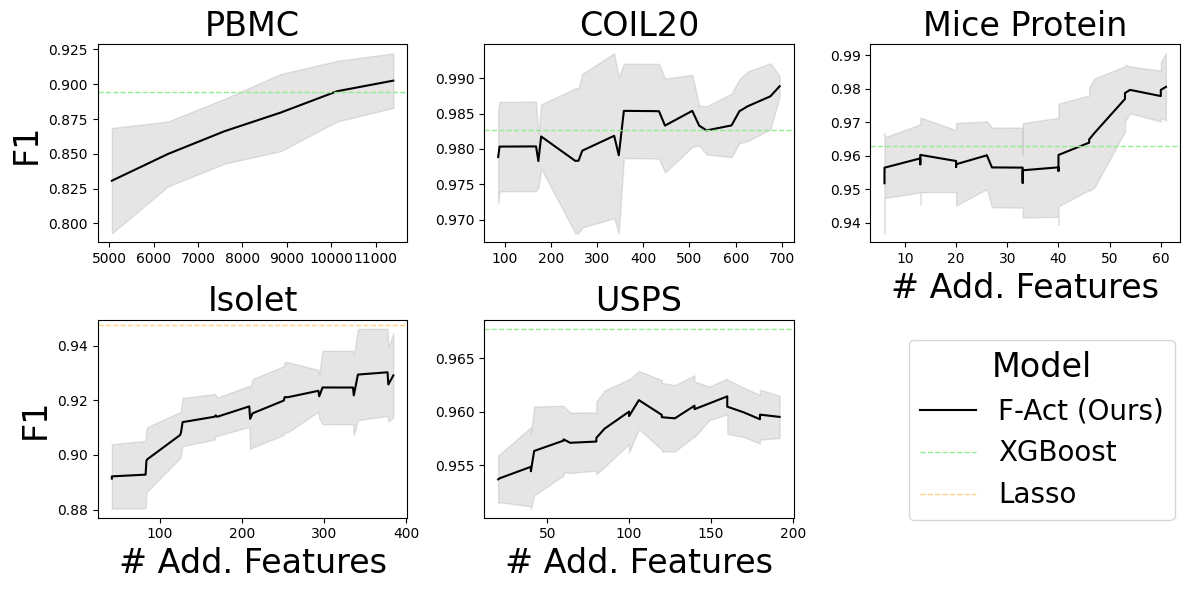

In [28]:
plot_smoothed_tti(df, top_models, save=True)

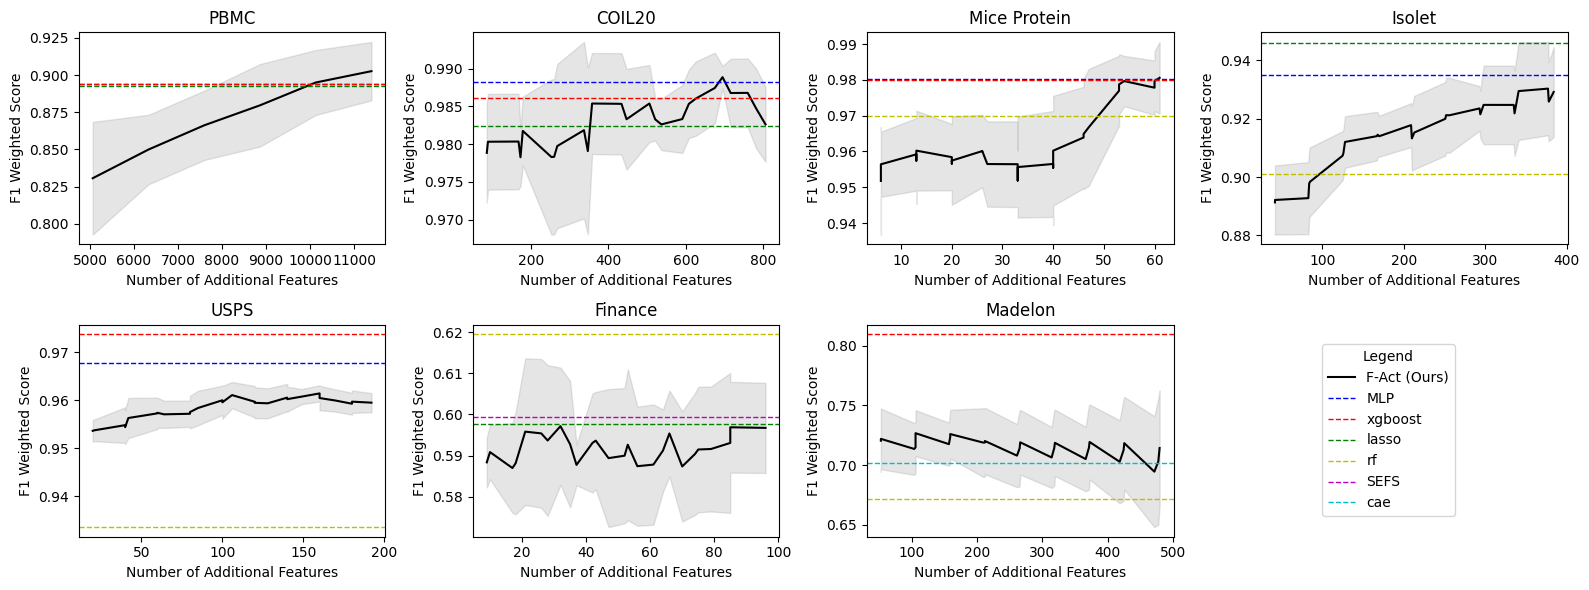

In [14]:
plot_smoothed_tti(df, top_models, save=True)


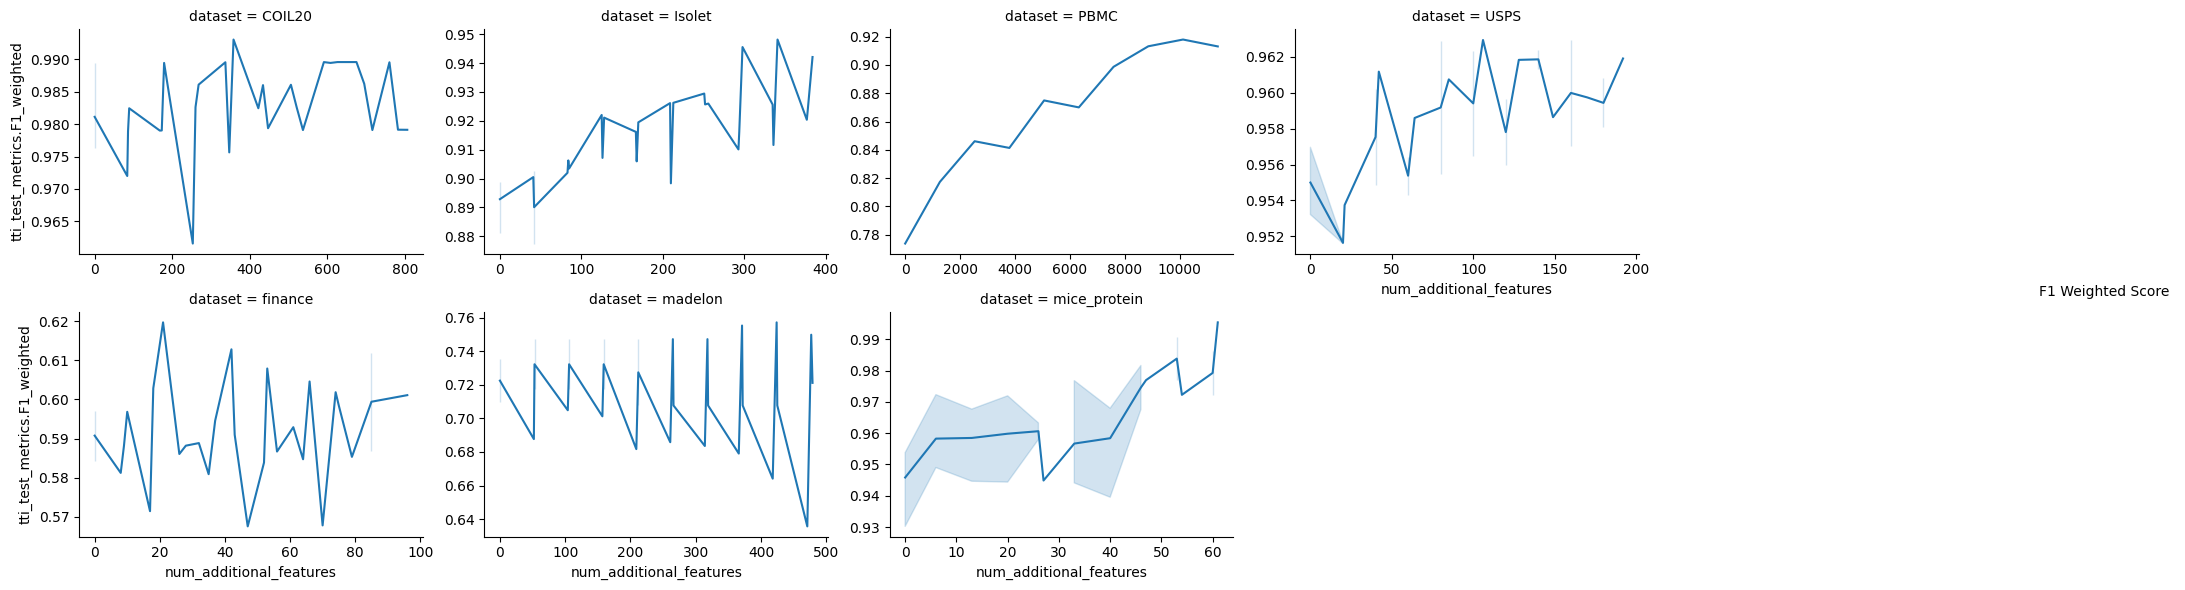

In [ ]:
plot_tti_all_datasets(df)

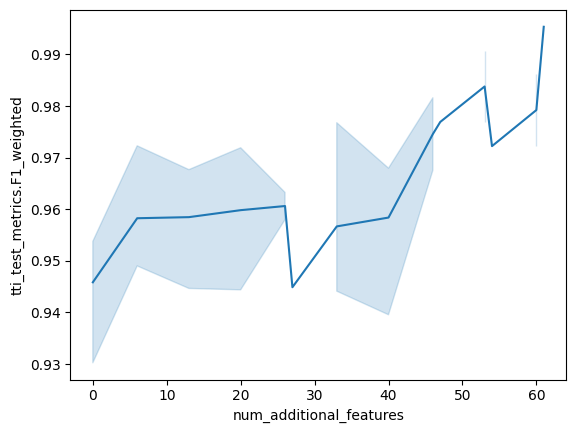

In [37]:
plot_tti_dataset(df, 'mice_protein')